# Description of the dataset and the task
- Data Collection
- Implications on the types of conclusions that could be made from the data
- Description of the variables, observations, and/or structure of the data
- Target task

In [1]:
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
import dask.bag as bag
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Create a list with the filepaths for training and testing
batch_size = 32
img_height = 224
img_width = 224

train_path = Path('dataset/train')
test_path = Path('dataset/test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, 
    seed=123, 
    image_size=(img_height, img_width))

class_names = train_ds.class_names
print(class_names)
print(len(class_names))

Found 3630 files belonging to 33 classes.
Using 2904 files for training.
Found 3630 files belonging to 33 classes.
Using 726 files for validation.
Found 330 files belonging to 33 classes.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
33


In [3]:
class_names = np.array(train_ds.class_names)
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato' 'raddish'
 'soy beans' 'spinach' 'sweetpotato' 'tomato' 'turnip' 'watermelon']


In [4]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


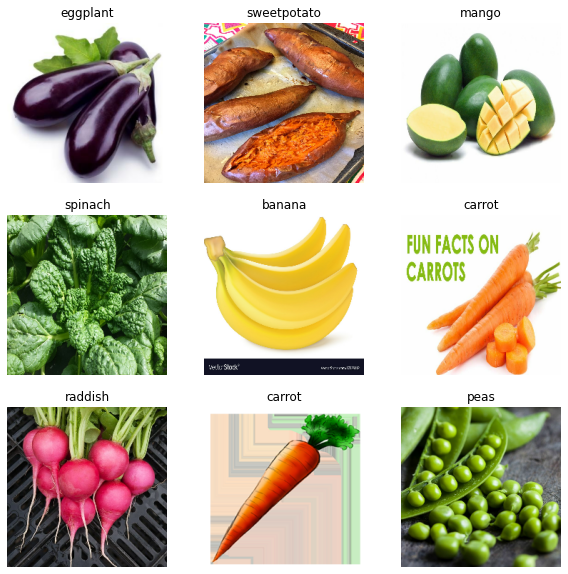

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Exploratory data analysis

This block of code initializes file paths for the folders and images that are going to be used for the exploratory data analysis.

In [6]:
# train_dir = Path('dataset/train')
# train_filepaths_jpg = list(train_dir.rglob(r'**/*.jpg'))
# train_filepaths_jpeg = list(train_dir.rglob(r'**/*.jpeg'))
# train_filepaths_png = list(train_dir.rglob(r'**/*.png'))
# train_filepaths = train_filepaths_jpg + train_filepaths_jpeg + train_filepaths_png


# def proc_img(filepath):
#     """ Create a DataFrame with the filepath and the labels of the pictures
#     """

#     labels = [str(filepath[i]).split("\\")[-2] \
#               for i in range(len(filepath))]

#     filepath = pd.Series(filepath, name='Filepath').astype(str)
#     labels = pd.Series(labels, name='Label')

#     # Concatenate filepaths and labels
#     df = pd.concat([filepath, labels], axis=1)

#     # Shuffle the DataFrame and reset index
#     df = df.sample(frac=1).reset_index(drop = True)
    
#     return df

# train_df = proc_img(train_filepaths)
# train_df = train_df.sort_values("Label")
# labels = train_df["Label"].unique()
# labels.sort()
# # train_df
# # train_df.loc[train_df["Label"] == label]

# i=0
# imagePath = {}

# for label in labels:
#     imagePath[i] = [fn for fn in os.listdir(f'{train_dir}\\{label}') if fn.endswith('.jpg')]
#     temp = [fn for fn in os.listdir(f'{train_dir}\\{label}') if fn.endswith('.png')]
#     for j in temp:
#         imagePath[i].append(j)
#     temp = [fn for fn in os.listdir(f'{train_dir}\\{label}') if fn.endswith('.jpeg')]
#     for j in temp:
#         imagePath[i].append(j)
#     i+=1

# Distribution of Sizes
The distribution of sizes is shown by obtaining the dimensions of the image namely its height, weight, and depth if it has depth. The height and weight are then compiled into a scatterplot for easy visualization with each fruit and vegetable having its own graph. Knowing the distribution of sizes can help us understand which size is appropriate to be used for pre-processing purposes to normalize the sizes of each image and better tune the model.

In [7]:
# # Distribution of Sizes
# classDirectories = {}
# for label in labels:
#     classDirectories[label] = 'dataset/train/' + label + '/'

# def get_dims(file):
#     im = Image.open(file)
#     arr = np.array(im)
#     if (len(arr.shape) == 3):
#         h,w,d = arr.shape
#     else:
#         h,w = arr.shape
#     return h,w

In [8]:
# for n,d in classDirectories.items():
#     filepath = d
#     filelist = [filepath + f for f in os.listdir(filepath)]
#     dims = bag.from_sequence(filelist).map(get_dims)
#     with ProgressBar():
#         dims = dims.compute()
#         dim_df = pd.DataFrame(dims, columns=['height', 'width'])
#         sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
#         sizes.plot.scatter(x='width', y='height');
#         plt.xlim(0, 8000)
#         plt.ylim(0, 8000)
#         plt.title('Image Sizes (pixels) | {}'.format(n))

It can be seen from the results above that most images gather around the 0-2000 height and width so it is important to run it again and limit the view to those of that size.

In [9]:
# for n,d in classDirectories.items():
#     filepath = d
#     filelist = [filepath + f for f in os.listdir(filepath)]
#     dims = bag.from_sequence(filelist).map(get_dims)
#     with ProgressBar():
#         dims = dims.compute()
#         dim_df = pd.DataFrame(dims, columns=['height', 'width'])
#         sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
#         sizes.plot.scatter(x='width', y='height');
#         plt.xlim(0, 2000)
#         plt.ylim(0, 2000)
#         plt.title('Image Sizes (pixels) | {}'.format(n))

It can be observed that most images land in the size 250x250 to 750x750

# Distribution of Labels
By checking the directories of each label the amount of images per fruit and vegetable can be shown in a bar graph with number of images in the y-axis and label in the x-axis. Knowing the proper distrubtion of labels can help determine which image has a different count from others. It is important for each label to have the same amount of images as it may affect the training of the model later on.

In [10]:
# # Distribution of Labels
# number_classes = {}
# for label in labels:
#     number_classes[label] = len(os.listdir(f'{train_dir}\\{label}'))
# f, ax = plt.subplots(figsize=(33,20)) # set the size that you'd like (width, height)
# plt.bar(number_classes.keys(), number_classes.values(), width = .5)
# plt.title("Number of Images by Class");
# plt.xlabel('Class Name');
# plt.ylabel('# Images');

# Data Pre-processing and Cleaning

In [11]:
# num_classes=33
# IMG_SIZE = 244
# resize_and_rescale = tf.keras.Sequential([
#   tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
#   tf.keras.layers.Rescaling(1./255)
# ])

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
# ])
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.2),
# ])

In [12]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
# train_ds = prepare(train_ds, shuffle=True, augment=True)
# val_ds = prepare(val_ds)
# test_ds = prepare(test_ds)

In [14]:
# model = tf.keras.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(num_classes)
# ])

In [15]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [16]:
# epochs=10
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

In [17]:
# model.summary()

In [18]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [19]:
# loss, acc = model.evaluate(test_ds)
# print("Accuracy", acc)

In [20]:
# import os
# img = tf.keras.utils.load_img(
#     'Image_110.jpg', target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

In [21]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

%load_ext tensorboard

# Model Training

We will make use of **MobileNetV2**, a pre-trained network for image classification. Through this network, **transfer learning** will be performed to make the classification of fruits and vegetables much easier.

We begin by extracting the labels from **ImageNet**, a database of images, to initially test out the their labels on our dataset. We also extract MobileNetV2 for later use.

In [22]:
# labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
# imagenet_labels = np.array(open(labels_path).read().splitlines())

# mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# classifier_model = mobilenet_v2

We define the size of the images and create a **sequential model**. This type of model means building the network one layer at a time. MobileNetV2 is wrapped in a Keras layer to be called later.

In [23]:
IMAGE_SHAPE = (224, 224)

# classifier = tf.keras.Sequential([
#     hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
# ])

We normalize the values of the input betwee [0, 1] and apply it into our dataset. 

In [24]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [25]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
val_ds = val_ds.map(lambda x, y: (data_augmentation(x), y))

While the input pipeline is running, optimization algorithms are implemented to monitor the CPU allocation and tune the value dynamically at runtime

In [26]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Test datasets are then shuffled.

In [27]:
# for image_batch, labels_batch in train_ds:
#     print(image_batch.shape)
#     print(labels_batch.shape)
#     break

# # test_ds = test_ds.shuffle(2)
# for test_image_batch, test_labels_batch in test_ds:
#     print(image_batch.shape)
#     print(labels_batch.shape)
#     break

The pre-trained model will now be used to predict the trainn dataset.

In [28]:
# result_batch = classifier.predict(train_ds)

We will now use the labels of ImageNet to check if it can identify the fruits and vegetables properly.

In [29]:
# predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
# predicted_class_names

In [30]:
# plt.figure(figsize=(18,20))
# plt.subplots_adjust(hspace=0.5)
# for n in range(30):
#     plt.subplot(6,5,n+1)
#     plt.imshow(image_batch[n])
#     plt.title(predicted_class_names[n])
#     plt.axis('off')
# _ = plt.suptitle("ImageNet predictions")

As observed, making use of labels from ImageNet was not a good idea as some labels exists in ImageNet but not on our dataset. 

Now, we will make use of MobileNetV2 against our dataset.

In [31]:
# Load the pretained model
# pretrained_model = tf.keras.applications.MobileNetV2(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights='imagenet',
#     pooling='max'
# )

# pretrained_model = tf.keras.applications.InceptionV3(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights='imagenet',
#     pooling='max'
# )

pretrained_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [32]:
pretrained_model.layers

In [33]:
inputs = pretrained_model.input

# x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
# x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(33, activation='softmax')(pretrained_model.output)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size = 32,
    epochs=20,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=2,
#             restore_best_weights=True
#         )
#     ]
)

Epoch 1/20
 1/91 [..............................] - ETA: 10:48 - loss: 4.8681 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

Again, it will be tested against a batch of the test dataset and will be plotted.

In [ ]:
# test_ds = test_ds.shuffle(2)
for test_image_batch, test_labels_batch in test_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [ ]:
predicted_batch = model.predict(test_image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(test_image_batch[n])
    plt.title("True: " + str(class_names[test_labels_batch.numpy()[n]]) +  "\nPredicted: " + predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

# Confusion Matrix 
A confusion matrix is created to monitor the performance of our model with regard to how the test data is being classified. In this context we can observe, which fruits or vegetables are being misclassified with each other.

We start by predicting the classes of the test dataset using the convolutional neural network.

In [ ]:
predicted_test_ds = model.predict(test_ds)
predicted_test_ds_id = tf.math.argmax(predicted_test_ds, axis=-1)
predicted_test_ds_label = class_names[predicted_test_ds_id]
# print(predicted_test_ds_label)

We then draw the ground truth values/labels from the dataset.

In [ ]:
test_labels_array = []
for test_image_batch, test_labels_batch in test_ds:
    test_labels_array.append(test_labels_batch)
# test_labels_array

In [ ]:
mapped_test_values = []
for test_label in test_labels_array:
    for label in test_label:
        mapped_test_values.append(class_names[label])
# mapped_test_values

In [ ]:
acc = accuracy_score(mapped_test_values, predicted_test_ds_label)
print(f'Accuracy on the test set: {100*acc:.2f}%')

In [ ]:
cf_matrix = confusion_matrix(mapped_test_values, predicted_test_ds_label, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(mapped_test_values)), 
            yticklabels = sorted(set(mapped_test_values)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

Noticeable misclassifications can be seen between **lemon and mango**. This may be due to the **yellow skin or the shape** of the fruit. Other noteable misclassifications can be seen between, **turnip and radish**. This may be due the **shape both these vegetables have**. **Lettuce and cabbage** are also misclassified. This may be due to the **similar color** they have.

# Model Selection and Hyperparameter Tuning
- Change number of epochs
- Change the batch size
- Add/reduce the number of layers
- Change activation function in dense layer
- Change kernal/bias(?)

# Insights and conclusions